![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

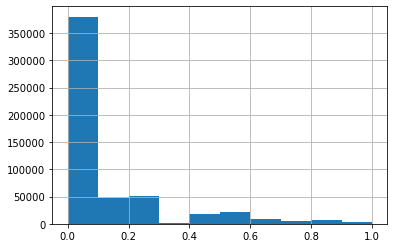

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [24]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [35]:
# Celda 1
vect_A = CountVectorizer(lowercase=False)
X_dtm_A = vect_A.fit_transform(X_train)
X_test_dtm_A = vect_A.transform(X_test)

xgb_model_A = XGBRegressor(random_state=42)
xgb_model_A.fit(X_dtm_A, y_train)

y_pred = xgb_model_A.predict(X_test_dtm_A)
mse_A = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse_A}')



MSE: 0.0216784577144372


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [38]:
# Celda 2
vect_B = CountVectorizer(lowercase=False, ngram_range=(3, 3))
X_dtm_B = vect_B.fit_transform(X_train)
X_test_dtm_B = vect_B.transform(X_test)

xgb_model_B = XGBRegressor(random_state=42)
xgb_model_B.fit(X_dtm_B, y_train)

y_pred = xgb_model_B.predict(X_test_dtm_B)
mse_B = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse_B}')

MSE: 0.03693620036009387


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [ ]:
#Celda 3


 La función **TfidfVectorizer** es una técnica de tokenización y ponderación que se utiliza en el preprocesamiento de texto en tareas de NLP. Esta función convierte una colección de documentos de texto en una matriz numérica utilizando la medida TF-IDF (Term Frequency-Inverse Document Frequency) para representar la importancia de cada palabra en un documento con respecto a toda la colección de documentos. El proceso generalmente consta de los siguientes pasos:

1. Tokenización: Divide los documentos en palabras o "tokens" y crea un vocabulario.
2. Cálculo de la frecuencia de término (TF): Cuenta la frecuencia de cada palabra en cada documento.
3. Cálculo de la frecuencia inversa de documento (IDF): Mide cuán común es una palabra en todos los documentos de la colección.
4. Cálculo de TF-IDF: Combina las medidas TF e IDF en un solo valor.
5. Generación de la matriz numérica: Utiliza los valores de TF-IDF para representar cada documento como un vector numérico.
6. Al comparar TfidfVectorizer con CountVectorizer, se pueden identificar algunas ventajas y desventajas:

**Ventajas de TfidfVectorizer:**

* Proporciona una representación numérica más informativa al tener en cuenta la importancia de las palabras en toda la colección de documentos.
* Reduce la influencia de palabras comunes o "stop words" que tienen poca importancia en la diferenciación de documentos.
* Mejora el rendimiento en algunas tareas de NLP, como la clasificación de texto o la recuperación de información, al asignar más importancia a las palabras relevantes.

**Desventajas de TfidfVectorizer:**

* La complejidad computacional es ligeramente mayor en comparación con CountVectorizer debido al cálculo adicional de IDF.
* Puede ser menos efectivo en conjuntos de datos muy pequeños o en tareas en las que las palabras comunes son igualmente importantes que las palabras menos comunes.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [48]:
# Celda 4
vect_C = TfidfVectorizer(lowercase=False)
X_dtm_C = vect_C.fit_transform(X_train)
X_test_dtm_C = vect_C.transform(X_test)

xgb_model_C = XGBRegressor(random_state=42)
xgb_model_C.fit(X_dtm_C, y_train)

y_pred = xgb_model_C.predict(X_test_dtm_C)
mse_C = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE C: {mse_C}')


# Usando un triagrama
vect_D = TfidfVectorizer(lowercase=False, ngram_range=(3, 3))
X_dtm_D = vect_D.fit_transform(X_train)
X_test_dtm_D = vect_D.transform(X_test)

xgb_model_D = XGBRegressor(random_state=42)
xgb_model_D.fit(X_dtm_D, y_train)

y_pred = xgb_model_D.predict(X_test_dtm_D)
mse_D = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE D: {mse_D}')

MSE C: 0.02145565867434081
MSE D: 0.03688018166290631


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

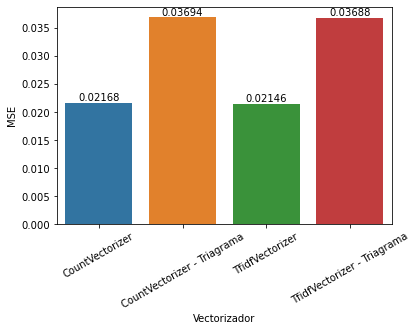

In [49]:
# Celda 5
fig, ax = plt.subplots()

mse_list = [mse_A, mse_B, mse_C, mse_D]
labels = ['CountVectorizer', 'CountVectorizer - Triagrama', 'TfidfVectorizer', 'TfidfVectorizer - Triagrama']

sns.barplot(x=labels, y=mse_list, ax=ax)

for i in range(len(labels)):
    ax.annotate(str(round(mse_list[i], 5)), xy=(i, mse_list[i]), ha='center', va='bottom')


plt.xlabel('Vectorizador')
plt.ylabel('MSE')
ax.set_xticklabels(labels, rotation=30)

plt.show()

> * Los modelos que utilizan tanto CountVectorizer como TfidfVectorizer con n-gramas por defecto (unigramas) tienen un rendimiento similar, con un MSE ligeramente menor en el caso de TfidfVectorizer. Esto indica que la ponderación de términos basada en la frecuencia de documentos inversa (IDF) proporcionada por TfidfVectorizer puede ayudar a mejorar un poco el rendimiento del modelo al enfocar la atención en palabras más significativas.

> * Los modelos que utilizan trigramas tienen un rendimiento considerablemente peor (MSE más alto) en comparación con los modelos que utilizan unigramas. Esto puede deberse a que la inclusión de trigramas introduce una mayor dimensionalidad y complejidad en los datos, lo que puede dificultar la tarea de aprendizaje del algoritmo de regresión. 

> * En general, se puede observar que el preprocesamiento de texto y la elección del vectorizador afectan el rendimiento del modelo. La ponderación de términos y la selección adecuada de n-gramas pueden tener un impacto en el desempeño, y es importante experimentar con diferentes configuraciones para encontrar la mejor solución para un problema específico.